<a name = "inicio"></a>
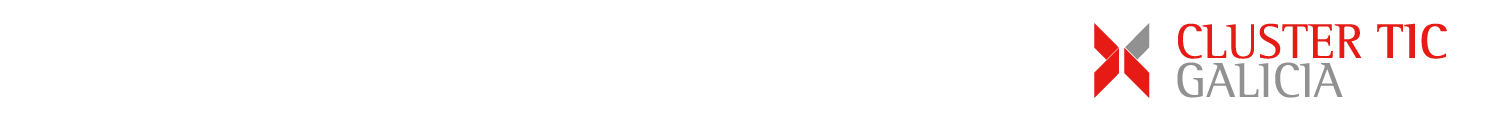

<div style="font-size: 50px;text-align: center;height:70px;padding:10px;margin:10px 0 0 0;">Configuración avanzada</div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
tips = sns.load_dataset("tips")
titanic = sns.load_dataset("titanic")

# Facets

En Seaborn, los "**facets**" son una forma de crear gráficos que dividen los datos en subconjuntos basados en las características de los datos y muestran cada uno de estos subconjuntos en su propio subgráfico. Este enfoque es especialmente útil para explorar y visualizar la relación entre variables dentro de diferentes segmentos de un dataset. Seaborn permite la creación de *facets* mediante el uso de la función [Seaborn.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) y mediante las funciones gráficas a nivel de figura que hemos visto.

Esta técnica de mostrar paneles individuales conteniendo subconjuntos de los datos se conoce también como "*small multiples*" o "*trellis plotting*".

### sns.FacetGrid()

Veamos un ejemplo con la función *sns.FacetGrid*:

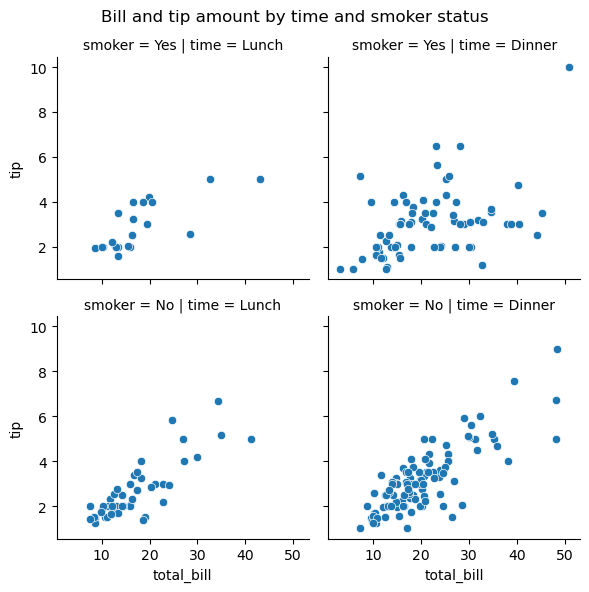

In [4]:
g = sns.FacetGrid(tips, col = "time", row = "smoker")

g.map(sns.scatterplot, "total_bill", "tip")
g.fig.suptitle("Bill and tip amount by time and smoker status")
g.fig.subplots_adjust(top=0.9)

plt.show()

Este ejemplo utiliza la función *sns.FacetGrid()* para crear un grid de diagramas de dispersión divididos en función de si el cliente es fumador o no, así como por la hora del día de la comida (si es almuerzo o cena). Los criterios de división de los datos se especifican durante la creación del *FacetGrid*. En este ejemplo se muestra por columnas la hora del día y por filas si el cliente es o no fumador.

Cada combinación de estas categorías tiene su propio scatter plot en el grid, lo que facilita ver cómo la relación entre la cuenta total y la propina podría variar entre estos grupos.

### sns.relplot()

Para ver un ejemplo de creación de facets usando la función *sns.relplot()* podemos partir de la siguiente gráfica:

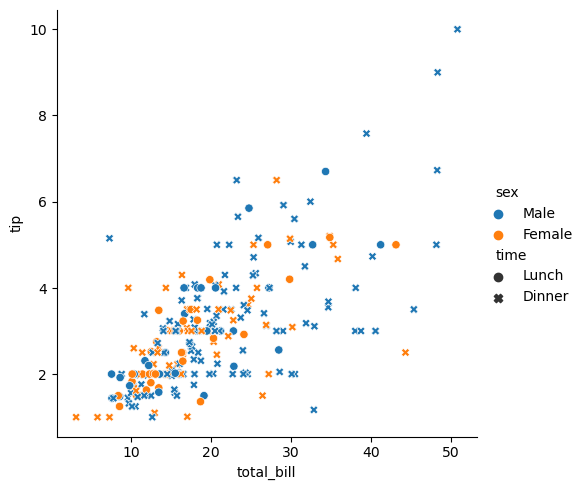

In [5]:
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "sex", style = "time")
plt.show()

En este ejemplo estamos cruzando las variables *tip* y *total_bill*, diferenciando los puntos según el sexo de la persona que dejó la propina, y usando símbolos distintos para diferenciar la hora de la comida. El resultado no es fácil de interpretar. Si creamos *facets* independientes, facilitamos enormemente la comparación de perfiles.

Por ejemplo, podemos mostrar columnas separadas por hora del día mediante el parámetro **col**:

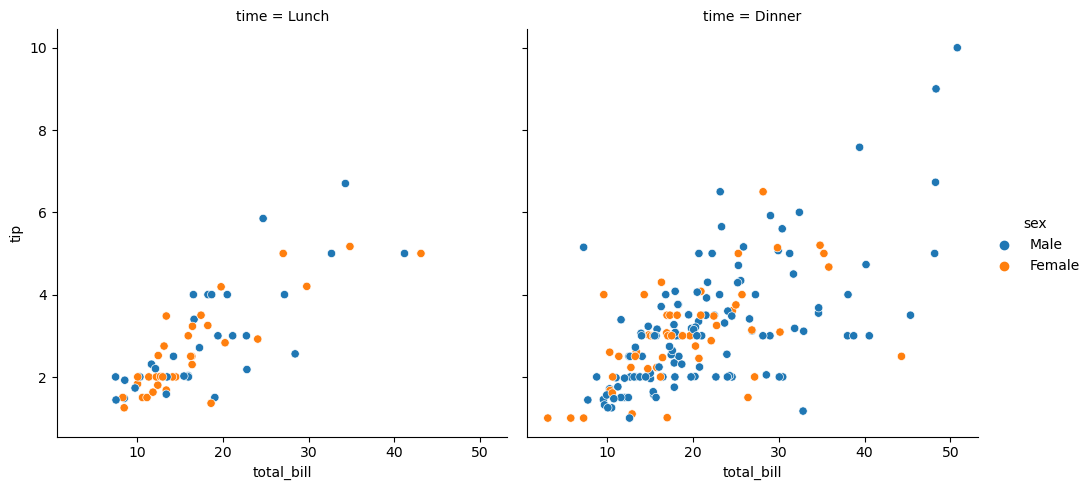

In [6]:
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "sex", col = "time")
plt.show()

Y podemos desagregar por filas según el sexo del cliente usando el parámetro **row**:

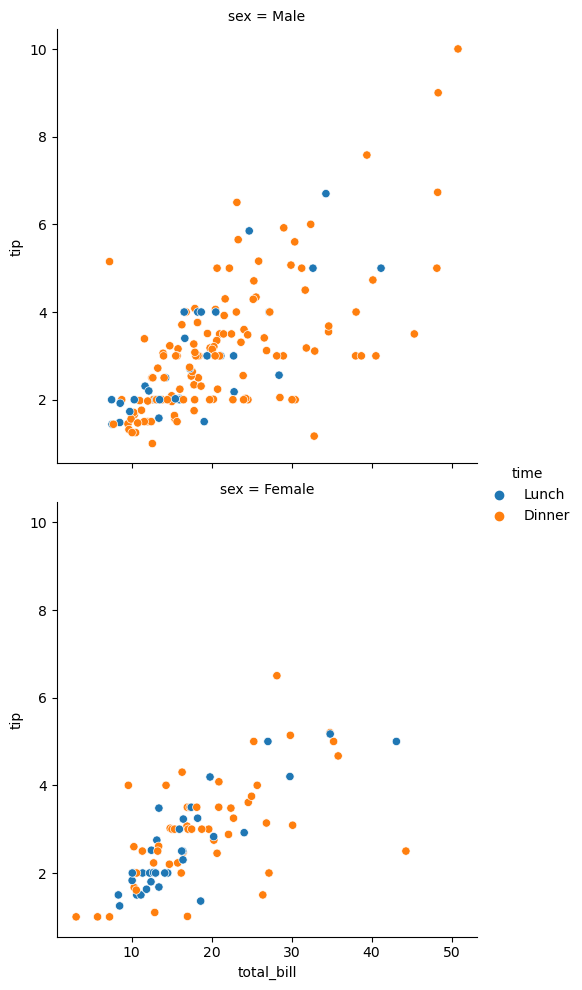

In [7]:
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "time", row = "sex")
plt.show()

Por supuesto, podemos combinar los parámetros **row** y **col** para desglosar nuestra gráfica base según estos dos criterios:

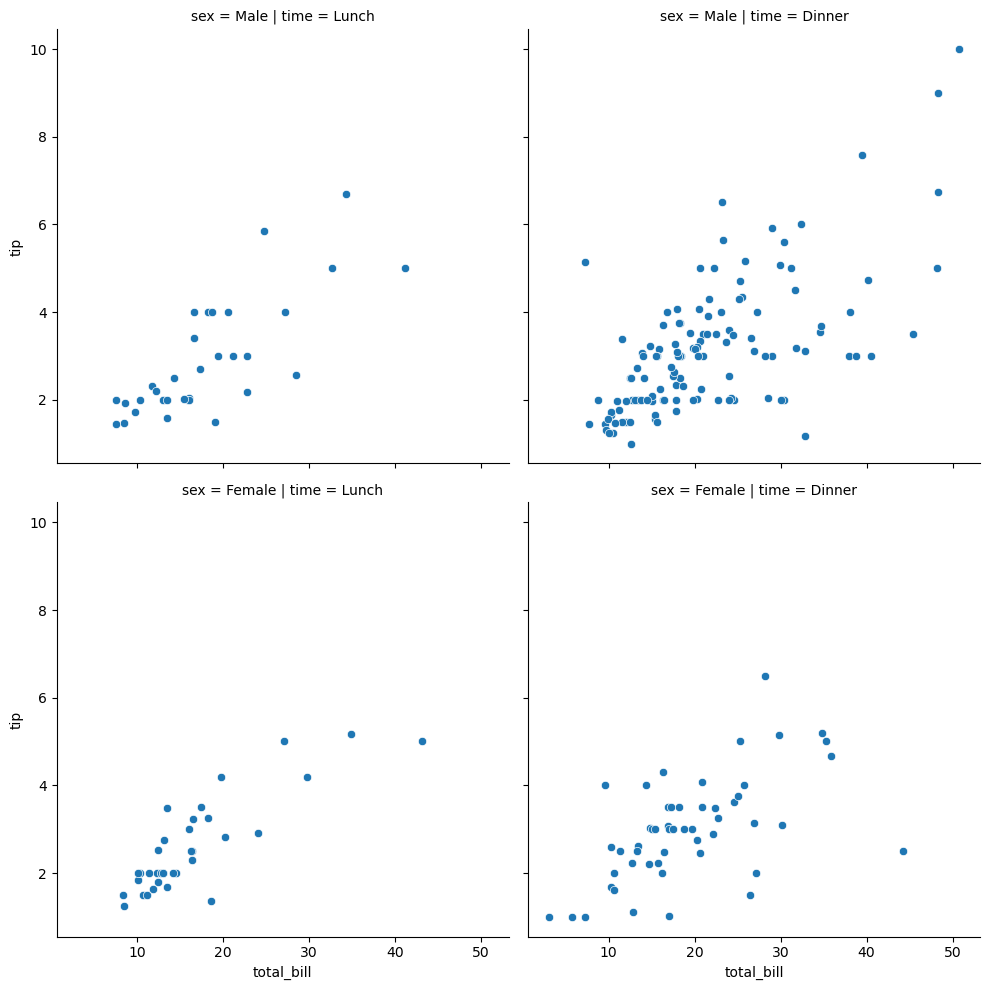

In [8]:
sns.relplot(data = tips, x = "total_bill", y = "tip", col = "time", row = "sex")
plt.show()

Lógicamente, si la cardinalidad de estas variables es elevada, podemos encontrarnos con gráficas excesivamente grandes. Una opción es modificar el tamaño de la figura usando los parámetros **height** y/o **aspect**: Por ejemplo, se muestra a continuación la figura anterior limitando la altura de la misma:

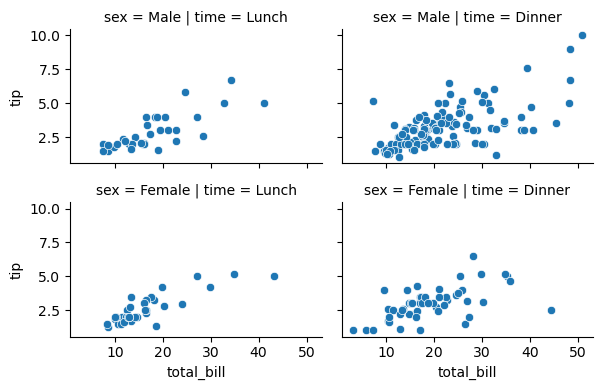

In [9]:
sns.relplot(
    data = tips,
    x = "total_bill",
    y = "tip",
    col = "time",
    row = "sex",
    height = 2,
    aspect = 1.5
)
plt.show()

Si estamos desagregando según una única variable y mostrando los facets en columnas, si la cardinalidad de esta variable es elevada, las gráficas resultantes puedes ser tan pequeñas que no sean apreciables los detalles:

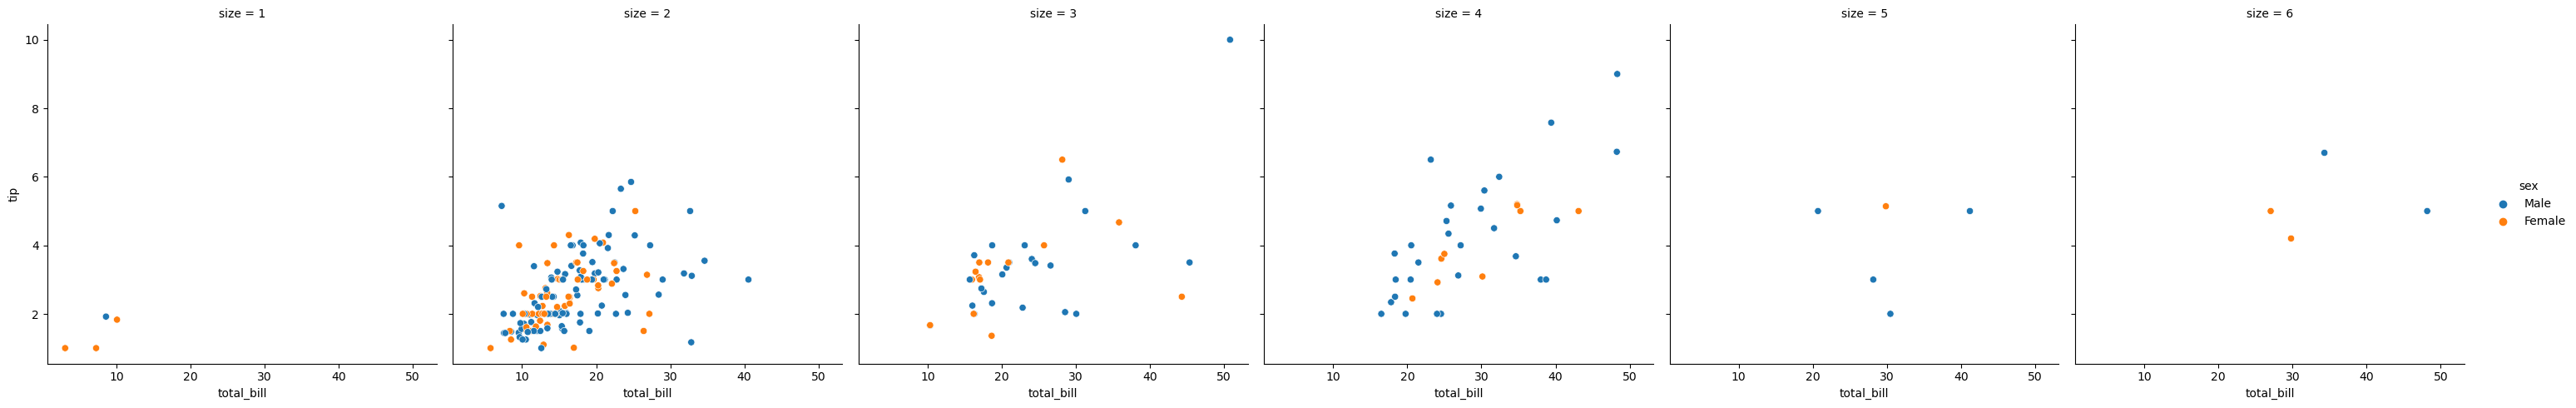

In [10]:
sns.relplot(
    data = tips,
    x = "total_bill",
    y = "tip",
    hue = "sex",
    col = "size"
)
plt.show()

En la imagen anterior estamos mostrando por columnas los valores del campo "*size*" que contiene el número de comensales. Efectivamente, es imposible incluso leer el título de cada gráfica.

La solución es limitar el número de gráficas por fila usando el parámetro **col_wrap**. Si repetimos la figura anterior limitando a 3 el número de gráficas por fila, el resultado es el siguiente:

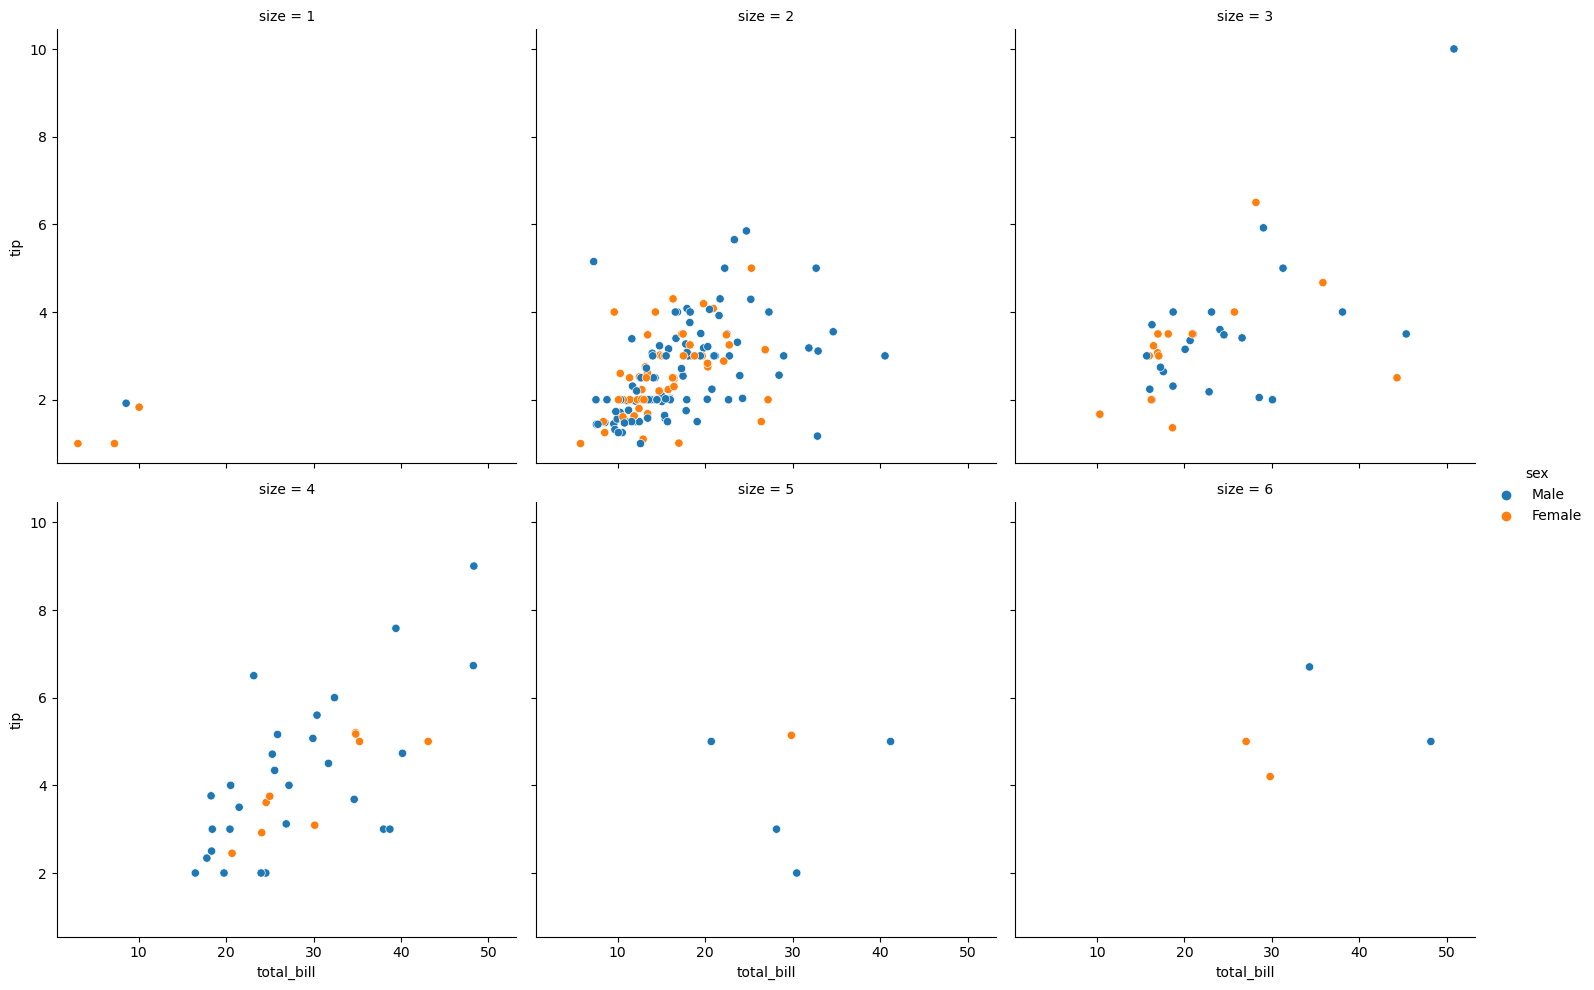

In [11]:
sns.relplot(
    data = tips,
    x = "total_bill",
    y = "tip",
    hue = "sex",
    col = "size",
    col_wrap = 3
)
plt.show()

mucho más claro, sin duda, aun cuando los valores según los cuales estamos desagregando los datos no se muestren estrictamente solo en columnas o en filas. Recordemos en todo caso que esta opción está disponible solo si los facets se reparten en columnas (no podemos estar haciendo uso del parámetro **row**).

### sns.lmplot()

También trabajando con modelos estadísticos es posible crear *facets* desagregando por columnas:

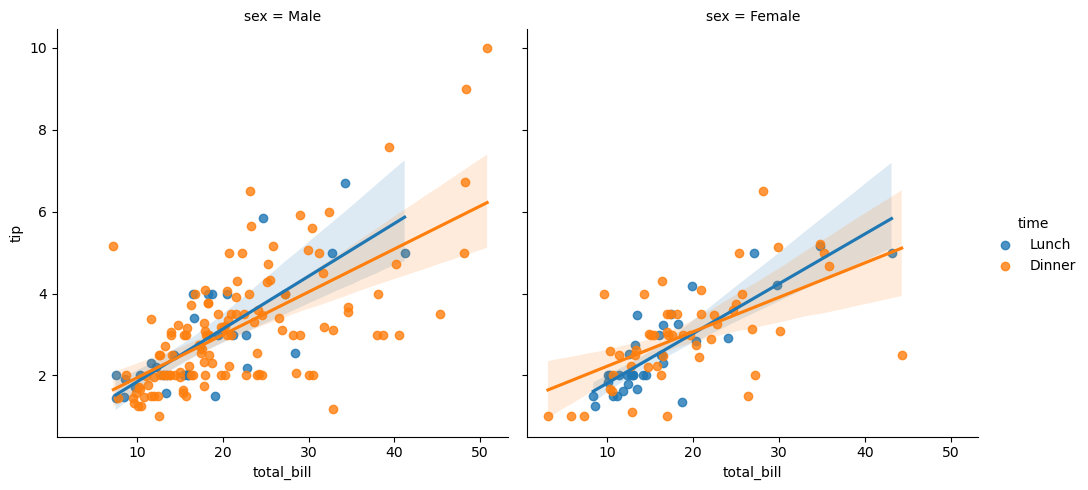

In [12]:
sns.lmplot(data = tips, x = "total_bill", y = "tip", hue = "time", col = "sex")
plt.show()

o por columna y filas:

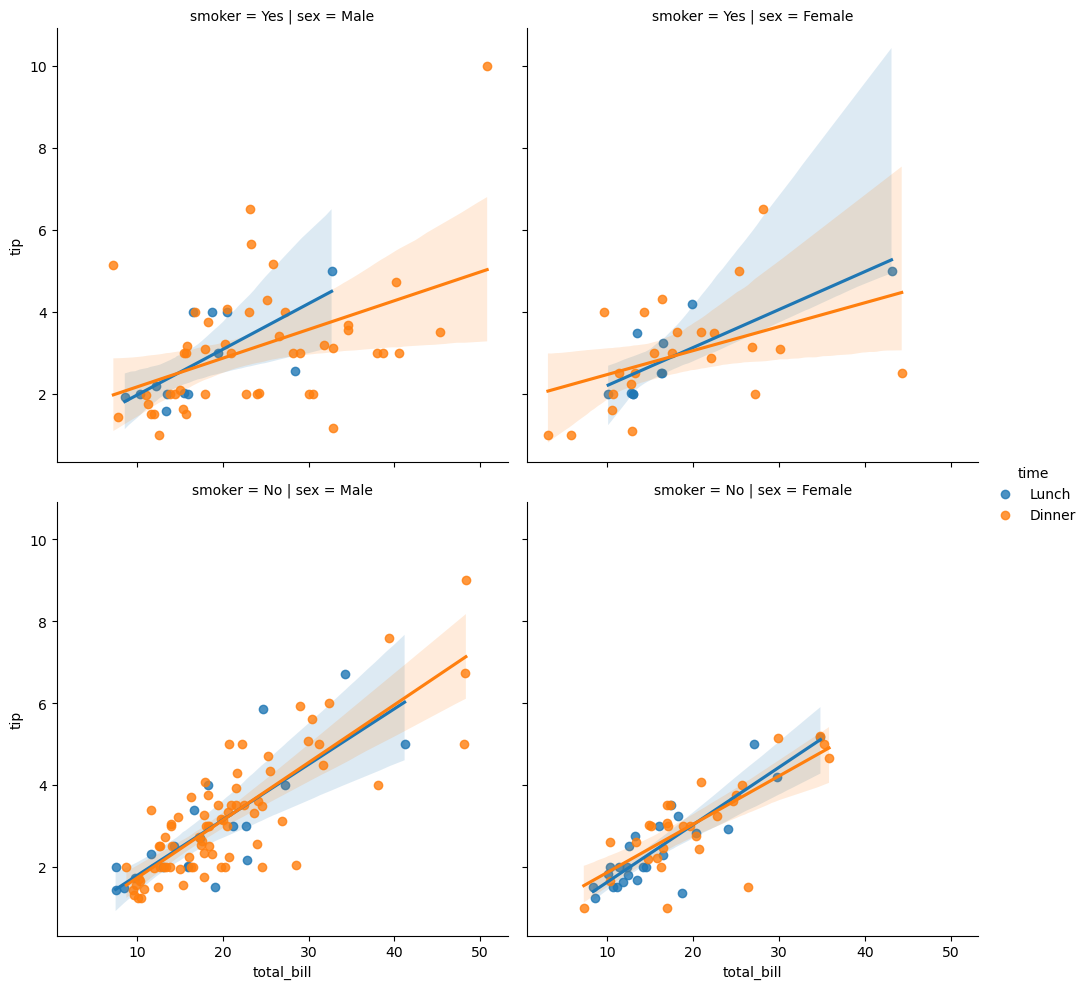

In [13]:
sns.lmplot(data = tips, x = "total_bill", y = "tip", hue = "time", col = "sex", row = "smoker")
plt.show()

### sns.catplot()

Veamos un ejemplo de *facets* con la función *sns.catplot()*:

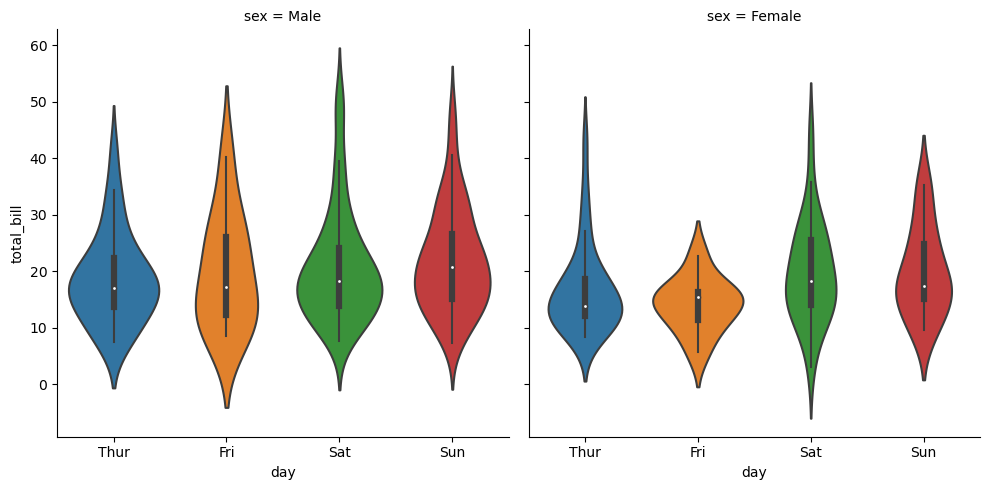

In [14]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "violin", col = "sex")
plt.show()

# Tamaño de las visualizaciones

Las funciones de visualización a nivel de ejes se van a crear en el eje especificado por el atributo $ax$ o, si no se especifica, en el eje actual (si no existe, se crea uno en una nueva figura). Esto supone que si deseamos controlar el tamaño de estas visualizaciones, basta con definir el tamaño de la figura con las herramientas de Matplotlib. Por ejemplo, mostremos el porcentaje de supervivientes del Titanic según su sexo y clase en la que viajaban:

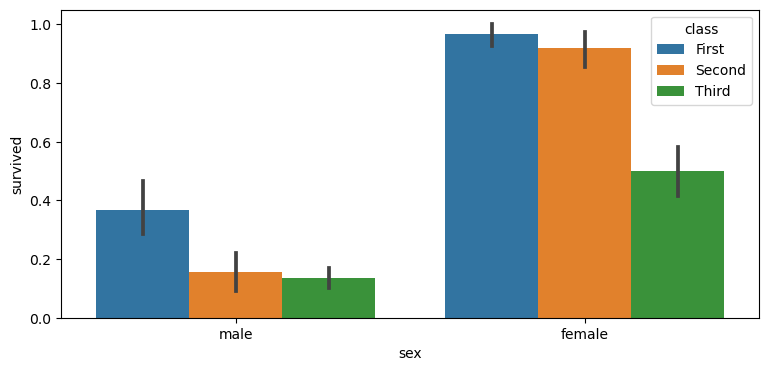

In [15]:
fig, ax = plt.subplots(figsize = (9, 4))
sns.barplot(data = titanic, x = "sex", y = "survived", hue = "class", ax = ax)
plt.show()

Con las funciones a nivel de figura es diferente, pues ya se ha comentado que éstas crean su propia figura y los conjuntos de ejes necesarios. En estas circunstancias, el tamaño de la figura vendrá definido por el tamaño de la gráfica principal a mostrar, o por el tamaño de un facet.

La configuración de estos tamaños, al contrario de lo que podría esperarse, no viene determinado por parámetros como *width* o *height*, sino por su altura y relación de aspecto (parámetros **height** y **aspect**, respectivamente). Por ejemplo, mostremos la misma gráfica que en el ejemplo anterior utilizando la función a nivel de figura correspondiente, [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html):

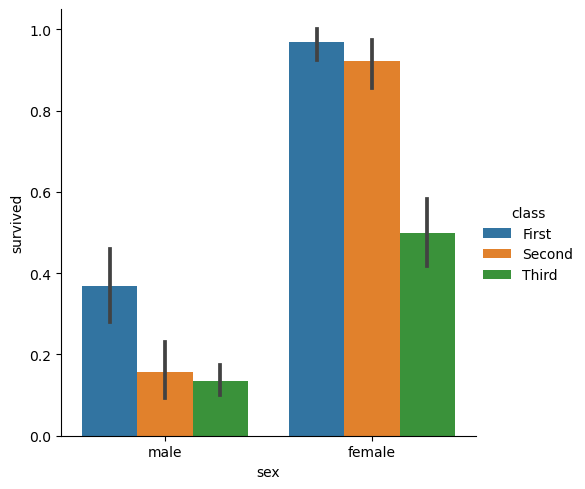

In [16]:
sns.catplot(data = titanic, x = "sex", y = "survived", hue = "class", kind = "bar")
plt.show()

Se trata de una única gráfica con una relación de aspecto 1:1 (su anchura es igual a la altura). Si repetimos la visualización indicando una altura de 3 (valor mucho menor que el valor por defecto) y una relación de aspecto de 2 (doble anchura que altura), el resultado es el siguiente:

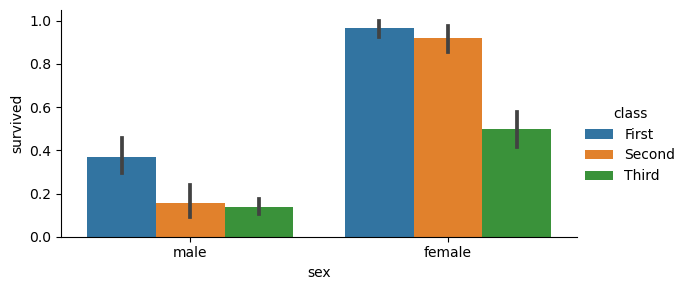

In [17]:
sns.catplot(
    data = titanic,
    x = "sex",
    y = "survived",
    hue = "class",
    kind = "bar",
    height = 3,
    aspect = 2
)
plt.show()

Repitamos la visualización usando *facets* y desagregando por clase:

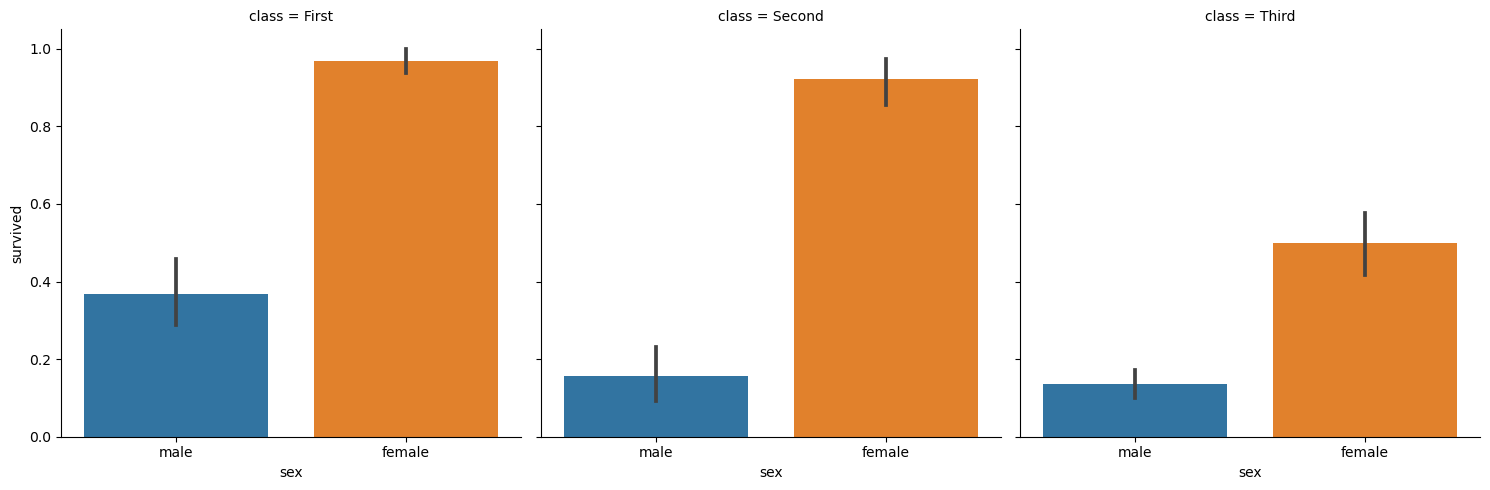

In [18]:
sns.catplot(data = titanic, x = "sex", y = "survived", col = "class", kind = "bar")
plt.show()

Cada facet tiene un tamaño por defecto semejante al de una visualización independiente (si el número de facets a mostrar horizontalmente no obliga a que sea menor). Indiquemos ahora una altura de 6 (algo superior a la altura por defecto) y una relación de aspecto de 0.5 (doble altura que anchura):

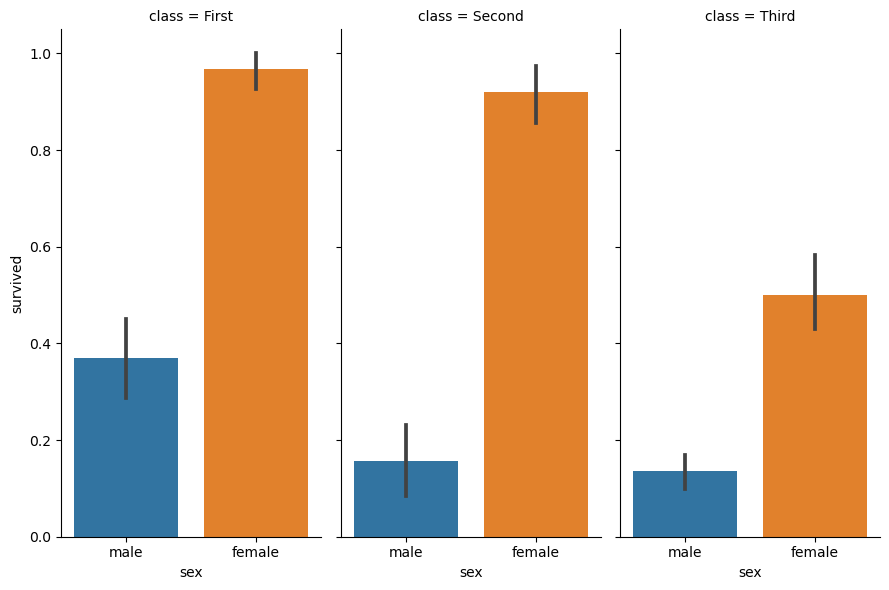

In [19]:
sns.catplot(
    data = titanic,
    x = "sex",
    y = "survived",
    col="class",
    kind = "bar",
    height = 6,
    aspect = 0.5
)
plt.show()

En general, tendremos que jugar con estos dos valores, *height* y *aspect* para conseguir el tamaño deseado, teniendo en cuenta que, si estamos usando facets, los valores que demos a dichos parámetros harán referencia a uno de ellos.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>